# Part II - Prosper Loan Dataset Exploration 
## by Robyn Hoover

## Investigation Overview
> This data exploration investigated loan data with the goal of determining which varibles are the most important to determine a lower interest rate. The variables investigated include: credit score, loan amount, loan term, borrower income, borrower state, APR, and loan type.


## Dataset Overview

> The Prosper Loan data contains 113,937 loans with 81 variables on each loan, including loan amount, interest rate, APR, loan type, borrower income, and many others. 

> This data dictionary was used to interpret all 81 variables: https://www.google.com/urlq=https://docs.google.com/spreadsheet/ccckey%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000. 

> The data set can be found here: https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1581581520570000.  The key insights in the slideshow must match those documented in the README.md summary. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData (1).csv")

## (Visualization 1)

> A higher credit score range seems to be correlated with a lower interest rate. This was the most important factor when determining a lower interest rate in all visualizations!

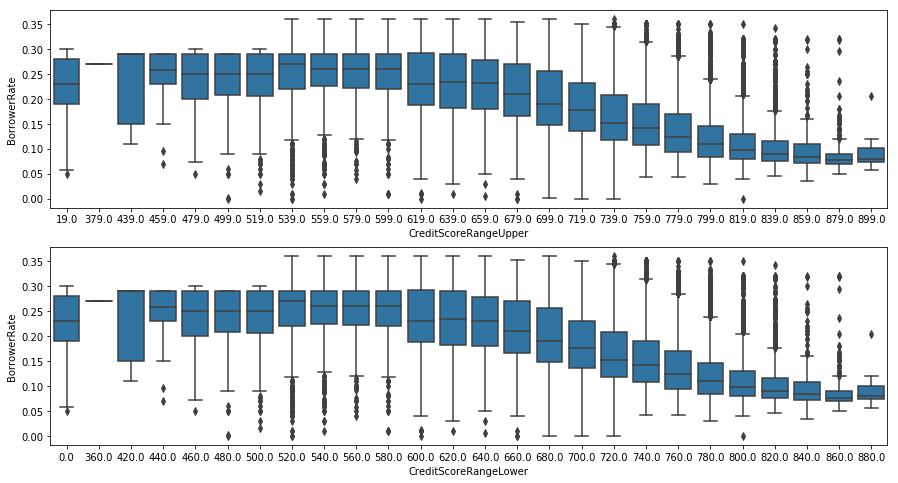

In [3]:
fig, ax = plt.subplots(nrows=2, figsize = [15,8])


default_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'CreditScoreRangeUpper', y= 'BorrowerRate', color = default_color, ax = ax[0])

sb.boxplot(data = df, x = 'CreditScoreRangeLower', y = 'BorrowerRate', color = default_color, ax = ax[1])


plt.show()

## (Visualization 2)
> The heat map shows the strongest correlation where loans less than $5000 have an interest rate between 25-30%. 

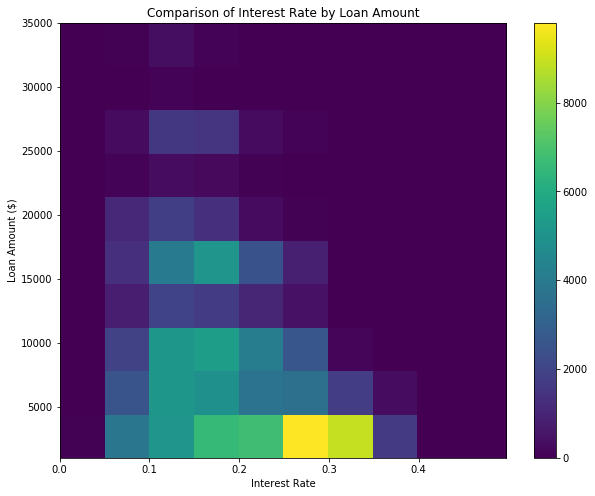

In [10]:
plt.figure(figsize=[10,8])
plt.hist2d(data = df, x = 'BorrowerRate', y = 'LoanOriginalAmount')
plt.colorbar()
plt.title('Comparison of Interest Rate by Loan Amount')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount ($)');

## (Visualization 3)

>A higher credit score and a loan term of 12 months tend to have the lowest interest rates.

Text(69,0.5,'Credit Score Range (Upper)')

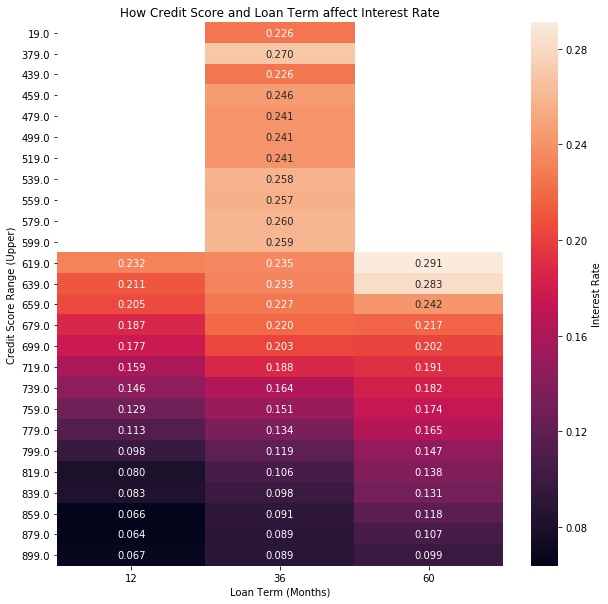

In [6]:
plt.figure(figsize=[10,10])
cat_means = df.groupby(['Term', 'CreditScoreRangeUpper']).mean()['BorrowerRate']
cat_means = cat_means.reset_index(name = 'Interest Rate')
cat_means = cat_means.pivot(index = 'CreditScoreRangeUpper', columns = 'Term',
                            values = 'Interest Rate')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Interest Rate'})
plt.title('How Credit Score and Loan Term affect Interest Rate')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Credit Score Range (Upper)')

## (Visualization 4)

>The majority of the loans in this dataset were less than $15,000.

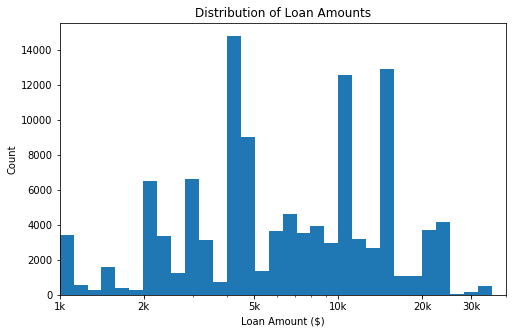

In [17]:
log_binsize = 0.050
bins = 10 ** np.arange(2.4, np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.title('Distribution of Loan Amounts')
plt.xscale('log')
plt.xlim([1e3, 4e4])
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 3e4], ['1k', '2k', '5k', '10k', '20k', '30k'])

plt.xlabel('Loan Amount ($)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 441255 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 